In [1]:
from inputs import start_date, end_date
from colour import Color
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Dataframe

Nasdaq_df = pd.read_csv(f"Analysis/Nasdaq_data_cleaned_{start_date}_{end_date}.csv")
Nasdaq_df = pd.DataFrame(Nasdaq_df)

Nasdaq_df

,Ticker number,Ticker,Week's Performance,Highest Price,Lowest Price,Best Day,Worst Day,Week's Volume
0,2785,FRGE,168.665%,$44.68,$11.94,76.797%,-11.135%,42405704714720752880972
1,1576,CLVRW,119.000%,$0.65,$0.20,40.524%,-41.180%,2642035114916271312
2,3528,HYMCL,118.977%,$0.80,$0.28,16.667%,-8.119%,31955415062343635
3,1575,CLVR,109.677%,$3.98,$1.22,91.521%,-35.254%,6119351496131999272447167546
4,2129,DRCT,99.038%,$5.49,$2.06,16.827%,-13.858%,22022005175617415459365
...,...,...,...,...,...,...,...,...
6958,7656,XFINW,-47.487%,$0.40,$0.21,0.030%,-26.677%,77122765
6959,4967,NMTC,-48.387%,$2.45,$1.08,3.226%,-32.571%,15729067112039803
6960,3576,ICVX,-59.000%,$13.46,$4.00,18.301%,-44.106%,26802694512177103346564
6961,4499,MEIP,-65.556%,$1.83,$0.53,6.207%,-34.663%,726172440557422775427060


In [3]:
# Remove Format and add Volatility

Nasdaq_df["Week's Performance"] = [float(percent.replace('%','')) for percent in Nasdaq_df["Week's Performance"]]
Nasdaq_df["Best Day"] = [float(percent.replace('%','')) for percent in Nasdaq_df["Best Day"]]
Nasdaq_df["Worst Day"] = [float(percent.replace('%','')) for percent in Nasdaq_df["Worst Day"]]
Nasdaq_df["Highest Price"] = [float(percent.replace('$','')) for percent in Nasdaq_df["Highest Price"]]
Nasdaq_df["Lowest Price"] = [float(percent.replace('$','')) for percent in Nasdaq_df["Lowest Price"]]
Nasdaq_df["Week's Volume"] = [float(percent) for percent in Nasdaq_df["Week's Volume"]]
Nasdaq_df["Volatility"] = abs(Nasdaq_df["Best Day"]) + abs(Nasdaq_df["Worst Day"])
    
Nasdaq_df

,Ticker number,Ticker,Week's Performance,Highest Price,Lowest Price,Best Day,Worst Day,Week's Volume,Volatility
0,2785,FRGE,168.665,44.68,11.94,76.797,-11.135,4.240570e+22,87.932
1,1576,CLVRW,119.000,0.65,0.20,40.524,-41.180,2.642035e+18,81.704
2,3528,HYMCL,118.977,0.80,0.28,16.667,-8.119,3.195542e+16,24.786
3,1575,CLVR,109.677,3.98,1.22,91.521,-35.254,6.119351e+27,126.775
4,2129,DRCT,99.038,5.49,2.06,16.827,-13.858,2.202201e+22,30.685
...,...,...,...,...,...,...,...,...,...
6958,7656,XFINW,-47.487,0.40,0.21,0.030,-26.677,7.712276e+07,26.707
6959,4967,NMTC,-48.387,2.45,1.08,3.226,-32.571,1.572907e+16,35.797
6960,3576,ICVX,-59.000,13.46,4.00,18.301,-44.106,2.680269e+22,62.407
6961,4499,MEIP,-65.556,1.83,0.53,6.207,-34.663,7.261724e+23,40.870


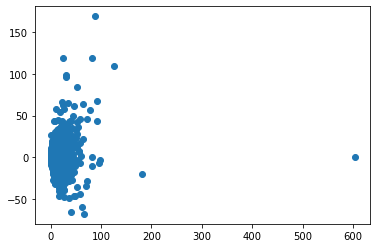

In [4]:
# Volatility vs performance

plt.scatter(Nasdaq_df["Volatility"], Nasdaq_df["Week's Performance"])

In [5]:
# Remove Outliers

def max_outlier(column_name):
    mean = column_name.mean()
    std = column_name.std()
    Max = mean + 2.5*std
    return Max

def min_outlier(column_name):
    mean = column_name.mean()
    std = column_name.std()
    mini = mean - 2.5*std
    return mini

Max_Volatility, Min_Volatility = max_outlier(Nasdaq_df['Volatility']), min_outlier(Nasdaq_df['Volatility'])
Max_Performance, Min_Performance = max_outlier(Nasdaq_df["Week's Performance"]
                                              ), min_outlier(Nasdaq_df["Week's Performance"])
Max_Price, Min_Price = max_outlier(Nasdaq_df["Highest Price"]), min_outlier(Nasdaq_df["Highest Price"])
Max_Volume, Min_Volume = max_outlier(Nasdaq_df["Week's Volume"]), min_outlier(Nasdaq_df["Week's Volume"])


Nasdaq_df = Nasdaq_df.loc[(Nasdaq_df['Volatility'] <= Max_Volatility) & (Nasdaq_df['Volatility'] >= Min_Volatility) &
                          (Nasdaq_df["Week's Performance"] <= Max_Performance) & 
                          (Nasdaq_df["Week's Performance"] >= Min_Performance) &
                          (Nasdaq_df["Highest Price"] <= Max_Price) & (Nasdaq_df["Highest Price"] >= Min_Price) &
                          (Nasdaq_df["Week's Volume"] <= Max_Volume) & (Nasdaq_df["Week's Volume"] >= Min_Volume)]

Nasdaq_df

,Ticker number,Ticker,Week's Performance,Highest Price,Lowest Price,Best Day,Worst Day,Week's Volume,Volatility
102,1126,BRIVW,21.976,0.51,0.41,21.341,-1.691,1.145412e+07,23.032
103,247,AHPAW,21.800,0.70,0.50,18.182,-5.385,9.202563e+13,23.567
107,5540,PHGE,21.528,1.82,1.37,18.243,-3.521,6.949861e+11,21.764
108,3751,IPA,21.516,5.08,3.96,8.279,-5.492,2.151402e+14,13.771
111,124,ADMA,21.333,1.90,1.48,8.642,-0.546,1.113316e+24,9.188
...,...,...,...,...,...,...,...,...,...
6876,6345,SHLS,-20.488,23.00,17.74,-0.516,-6.420,3.215825e+24,6.936
6877,5174,OCFT,-20.556,2.17,1.39,17.778,-16.256,1.238094e+20,34.034
6878,923,BGRYW,-20.688,0.75,0.44,8.297,-19.787,1.463515e+11,28.084
6880,3074,GLS,-20.800,6.25,4.35,13.900,-10.826,1.722160e+19,24.726


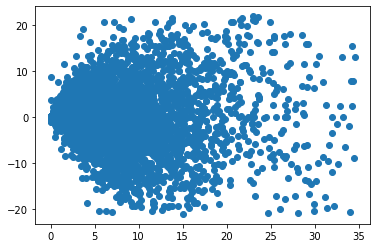

In [6]:
plt.scatter(Nasdaq_df['Volatility'], Nasdaq_df["Week's Performance"])

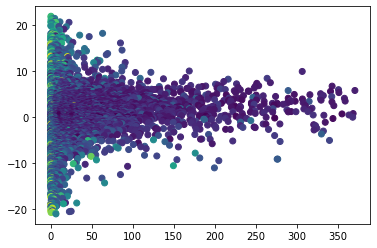

In [7]:
plt.scatter(Nasdaq_df["Highest Price"], Nasdaq_df["Week's Performance"], 
            c = Nasdaq_df['Volatility'])